In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os

# Path to the extracted dataset folder
dataset_path = '/content/drive/MyDrive/extracted_data'

# List all files and subdirectories in the folder
files = os.listdir(dataset_path)
print("Files in the extracted_data folder:")
print(files)

# Check folder structure if it's organized into subdirectories
for root, dirs, files in os.walk(dataset_path):
    print(f"Root: {root}")
    print(f"Directories: {dirs}")
    print(f"Files: {files}")
    break  # To check only the first level




Files in the extracted_data folder:
['10253', '10254', '10255', '10256', '10257', '10258', '10259', '10260', '10261', '10262', '10264', '10268', '10269', '10272', '10273', '10274', '10275', '10276', '10277', '10278', '10279', '10282', '10285', '10286', '10288', '10290', '10291', '10292', '10293', '10295', '10299', '10300', '10301', '10302', '10303', '10304', '10305', '10306', '10307', '10308', '12241', '12242', '12626', '12748', '12749', '12750', '12751', '12752', '12810', '12811', '12817', '12818', '12819', '12820', '12821', '12822', '12823', '12824', '12826', '12867', '12868', '12869', '12870', '12871', '12872', '12873', '12875', '12876', '12877', '12878', '12879', '12880', '12881', '12882', '12883', '12884', '12886', '12890', '12891', '12892', '12893', '12894', '12895', '12896', '12897', '12898', '12900', '12901', '12905', '12906', '12907', '12908', '12909', '12910', '12911', '12929', '12930', '12931', '12932', '12933', '12934', '12935', '12947', '12948', '12949', '12951', '12954', 

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # 20% for validation
)

val_datagen = ImageDataGenerator(rescale=1.0/255)


In [7]:
train_data = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),  # images to 128x128
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_data = val_datagen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


Found 60350 images belonging to 176 classes.
Found 0 images belonging to 176 classes.


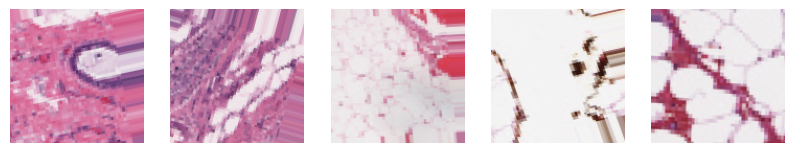

In [8]:
import matplotlib.pyplot as plt

images, labels = next(train_data)

plt.figure(figsize=(10, 10))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(images[i])
    plt.axis('off')
plt.show()


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
from tensorflow.keras.preprocessing import image
from PIL import UnidentifiedImageError

def safe_load_img(image_path):
    try:
        img = image.load_img(image_path)
        return img
    except UnidentifiedImageError:
        print(f"Warning: Unable to identify the image at {image_path}")
        return None


In [12]:
from tensorflow.keras.applications import ResNet50, VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam


In [14]:
# we are using ResNet50 pre trained model except training of our own due to lack of system resources.

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze layers of base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers for your task
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Convert feature maps to a single vector
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)  # Binary classification (cancer vs normal)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 128, 128, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 134, 134, 3)    │              0 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 64, 64, 64)     │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 64, 64, 64)     │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 64, 64, 64)     │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 66, 66, 64)     │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 32, 32, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 32, 32, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 32, 32, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 32, 32, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 32, 32, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 32, 32, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 32, 32, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 32, 32, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 32, 32, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 25,686,913 (97.99 MB)

 Trainable params: 2,099,201 (8.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [18]:
#Performing Data Augmentation And LOading

train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

val_datagen = ImageDataGenerator(rescale=1.0/255)

train_data = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_data = val_datagen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


Found 60350 images belonging to 176 classes.
Found 0 images belonging to 176 classes.


In [19]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras import backend as K


In [21]:
# Using Grad-CAM

def grad_cam(model, img_array, layer_name='conv5_block3_out'):
    """Generate Grad-CAM heatmap for the model."""
    # Get the gradient of the top predicted class w.r.t. the convolutional layer
    grad_model = Model(inputs=model.input, outputs=[model.output, model.get_layer(layer_name).output])
    with tf.GradientTape() as tape:
        tape.watch(img_array)
        model_out, conv_output = grad_model(img_array)
        class_out = model_out[:, np.argmax(model_out[0])]
    grads = tape.gradient(class_out, conv_output)

    # Pool the gradients over all the axes
    pooled_grads = K.mean(grads, axis=(0, 1, 2))

    # Multiply the feature map by the pooled gradients
    conv_output = conv_output[0]
    for i in range(conv_output.shape[-1]):
        conv_output[..., i] *= pooled_grads[i]

    # Generate heatmap
    heatmap = np.mean(conv_output, axis=-1)
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)

    return heatmap


In [22]:
# Grad-CAM Heatmap

def show_gradcam_heatmap(img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (128, 128))
    img = np.expand_dims(img, axis=0)
    img = img / 255.0

    # Generate heatmap
    heatmap = grad_cam(model, img)

    # Display original image and heatmap
    plt.imshow(cv2.cvtColor(img[0], cv2.COLOR_BGR2RGB))
    plt.imshow(heatmap, alpha=0.5, cmap='jet')
    plt.axis('off')
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


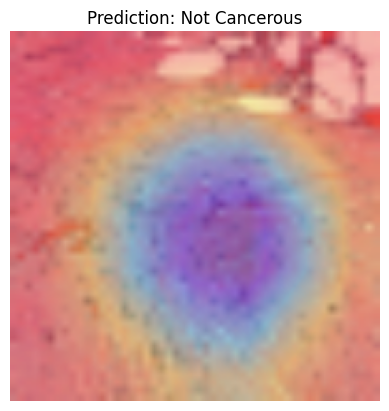

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


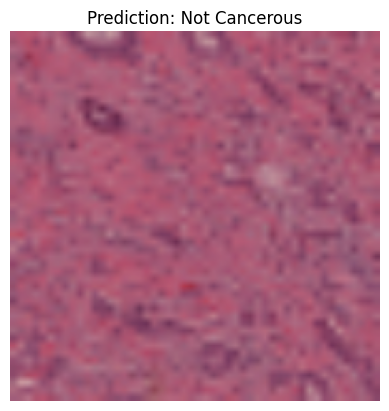

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


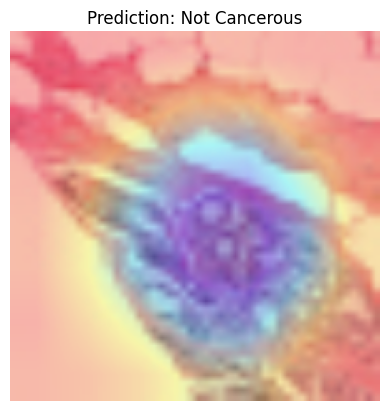

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


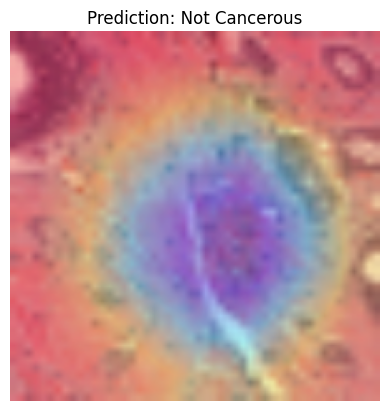

In [37]:
import tensorflow as tf  # Import TensorFlow
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing import image

# Define the Grad-CAM function
def grad_cam(model, img_array, layer_name):
    # Get the gradient of the top predicted class w.r.t. the convolutional layer
    grad_model = Model(inputs=model.input, outputs=[model.output, model.get_layer(layer_name).output])

    with tf.GradientTape() as tape:
        tape.watch(img_array)
        model_out, conv_output = grad_model(img_array)

    # Get the gradient of the predicted class with respect to the convolutional layer output
    grads = tape.gradient(model_out, conv_output)

    # Global Average Pooling for the gradients
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Multiply each channel in the convolutional output with the pooled gradient
    conv_output = conv_output[0]
    heatmap = tf.reduce_sum(conv_output * pooled_grads, axis=-1)  # Weighted sum across channels

    # Apply ReLU activation and normalize the heatmap
    heatmap = tf.maximum(heatmap, 0)
    heatmap = heatmap / tf.reduce_max(heatmap)

    # Convert to numpy array for visualization
    return heatmap.numpy()

# Define function to display Grad-CAM heatmap on image
def show_gradcam_heatmap(img_path, model):
    # Load the image
    img = cv2.imread(img_path)

    # Resize to 224x224 for ResNet50 input
    img_resized = cv2.resize(img, (224, 224))

    # Convert to RGB (from BGR as OpenCV loads images in BGR)
    img_rgb = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)

    # Prepare the image for the model (normalize and expand dims)
    img_array = np.expand_dims(img_resized, axis=0)
    img_array = img_array / 255.0  # Normalize

    # Convert to tensor
    img_array = tf.convert_to_tensor(img_array)

    # Generate Grad-CAM heatmap
    heatmap = grad_cam(model, img_array, 'conv5_block3_out')  # Example layer name for ResNet50

    # Resize heatmap to match the image size
    heatmap = cv2.resize(heatmap, (img_resized.shape[1], img_resized.shape[0]))

    # Handle NaN or Inf values in the heatmap
    heatmap = np.nan_to_num(heatmap)  # Replace NaN and Inf with 0

    # Apply heatmap: Jet colormap (heatmap) with 50% opacity
    heatmap = cv2.applyColorMap(np.uint8(255 * heatmap), cv2.COLORMAP_JET)

    # Blend the heatmap with the original image
    superimposed_img = cv2.addWeighted(img_rgb, 0.7, heatmap, 0.3, 0)

    # Predict if the image is cancerous or not
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=-1)[0]

    # Assuming the model is trained to predict cancerous vs. non-cancerous (0 = non-cancerous, 1 = cancerous)
    label = 'Cancerous' if predicted_class == 1 else 'Not Cancerous'

    # Plot the original image with the superimposed heatmap
    plt.imshow(superimposed_img)
    plt.title(f"Prediction: {label}")
    plt.axis('off')
    plt.show()

# Load pre-trained model (ResNet50)
model = ResNet50(weights='imagenet')  # Replace with your fine-tuned cancer detection model

# List of image paths to test
image_paths = [
    '/content/drive/MyDrive/extracted/3test.png',
    '/content/drive/MyDrive/extracted/4test.png',
    '/content/drive/MyDrive/extracted/2test.png',
    '/content/drive/MyDrive/extracted/5test.png',
]

# Loop through all image paths and run Grad-CAM on each
for img_path in image_paths:
    show_gradcam_heatmap(img_path, model)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


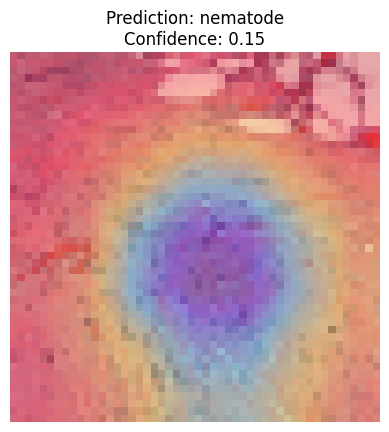

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


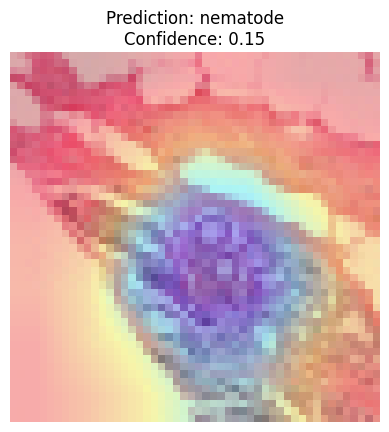

In [45]:
# Function to display Grad-CAM heatmaps with predictions
def display_heatmaps_with_predictions(image_paths, model):
    for img_path in image_paths:
        img_array = preprocess_image(img_path)
        predictions = model.predict(img_array)
        # Decode predictions directly from numpy array
        decoded_preds = imagenet_utils.decode_predictions(predictions)
        predicted_label = decoded_preds[0][0][1]
        confidence_score = decoded_preds[0][0][2]

        heatmap = grad_cam(model, img_array)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
        heatmap = cv2.applyColorMap(np.uint8(255 * heatmap), cv2.COLORMAP_JET)
        superimposed_img = cv2.addWeighted(img, 0.7, heatmap, 0.3, 0)

        # Display the image with overlayed text
        plt.imshow(superimposed_img)
        plt.axis('off')
        plt.title(f"Prediction: {predicted_label}\nConfidence: {confidence_score:.2f}")
        plt.show()

# Example: Visualize multiple test images
test_image_paths = [
    '/content/drive/MyDrive/extracted/3test.png',
    '/content/drive/MyDrive/extracted/2test.png'
]

# Load the model (e.g., ResNet50)
model = ResNet50(weights='imagenet')
display_heatmaps_with_predictions(test_image_paths, model)


In [46]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# Load ResNet50 with weights
base_model = ResNet50(weights='imagenet', include_top=False)

# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(2, activation='softmax')(x)

# Define new model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze base layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


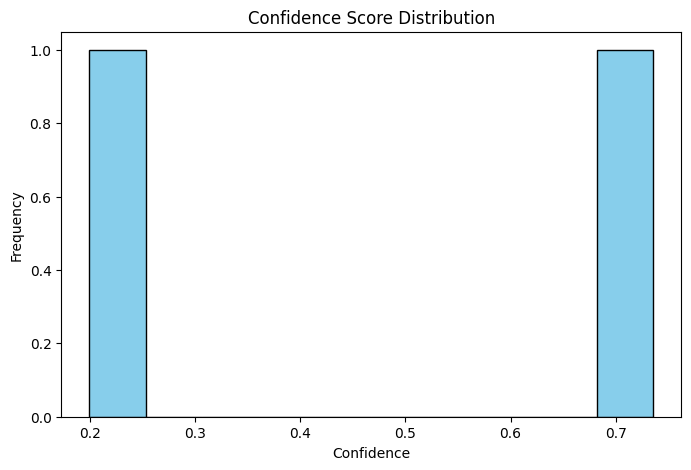

In [49]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications import imagenet_utils

# Preprocess the image for ResNet50
def preprocess_image_for_plot(img_path):
    """Preprocess an image for prediction."""
    img = image.load_img(img_path, target_size=(224, 224))  # Resize image to 224x224
    img_array = image.img_to_array(img)  # Convert to array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = preprocess_input(img_array)  # Preprocess the image for ResNet50
    return img_array

def plot_confidence_distribution(image_paths, model):
    """Plot confidence score distribution."""
    confidences = []
    for img_path in image_paths:
        try:
            img_array = preprocess_image_for_plot(img_path)
            predictions = model.predict(img_array, verbose=0)  # Get model predictions
            decoded_preds = imagenet_utils.decode_predictions(predictions)  # Decode predictions
            confidence_score = decoded_preds[0][0][2]  # Extract the confidence score of the top prediction
            confidences.append(confidence_score)
        except Exception as e:
            print(f"Error processing image {img_path}: {e}")

    if confidences:
        # Plot the histogram
        plt.figure(figsize=(8, 5))
        plt.hist(confidences, bins=10, color='skyblue', edgecolor='black')
        plt.title("Confidence Score Distribution")
        plt.xlabel("Confidence")
        plt.ylabel("Frequency")
        plt.show()
    else:
        print("No valid confidence scores to display.")

# Load the model (e.g., ResNet50)
model = ResNet50(weights='imagenet')

# Test with example images
test_image_paths = ['/content/drive/MyDrive/extracted/3test.png',
                    '/content/drive/MyDrive/extracted/2test.png']
plot_confidence_distribution(test_image_paths, model)


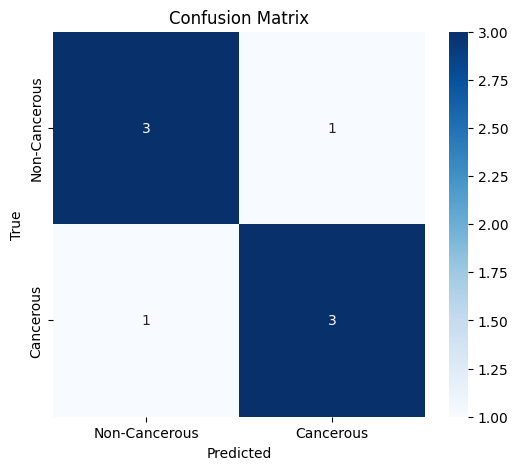

In [50]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Assuming y_true and y_pred are the true and predicted labels respectively
y_true = [0, 1, 1, 0, 0, 1, 1, 0]  # Example true labels
y_pred = [0, 1, 0, 0, 1, 1, 1, 0]  # Example predicted labels

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Cancerous', 'Cancerous'], yticklabels=['Non-Cancerous', 'Cancerous'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


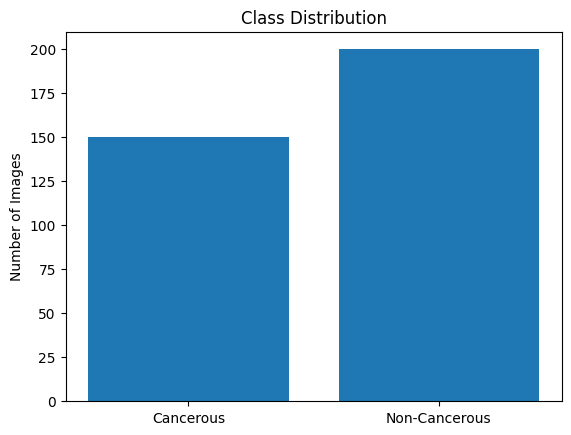

In [53]:
import matplotlib.pyplot as plt

# Example class distribution
class_labels = ['Cancerous', 'Non-Cancerous']
class_counts = [150, 200]  # Example counts for each class

plt.bar(class_labels, class_counts)
plt.title('Class Distribution')
plt.ylabel('Number of Images')
plt.show()
